In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving individual+household+electric+power+consumption.zip to individual+household+electric+power+consumption.zip


In [3]:


file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name, sep=';', low_memory=False)

print("Shape:", df.shape)
df.head()

Shape: (2075259, 9)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"], format="%d/%m/%Y %H:%M:%S", errors='coerce')
df = df.drop(columns=["Date", "Time"])
df = df.sort_values("Datetime").reset_index(drop=True)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [5]:
for col in df.columns:
    if col != "Datetime":
        df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna()  # drop rows with missing values
print("After cleaning:", df.shape)
df.head()

After cleaning: (2049280, 8)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00


In [6]:
df["Hour"] = df["Datetime"].dt.hour
df["Day"] = df["Datetime"].dt.day
df["DayOfWeek"] = df["Datetime"].dt.dayofweek
df["Month"] = df["Datetime"].dt.month
df["IsWeekend"] = df["DayOfWeek"].isin([5, 6]).astype(int)

df["Lag_1"] = df["Global_active_power"].shift(1)
df["Lag_24"] = df["Global_active_power"].shift(24)

df["RollingMean_6"] = df["Global_active_power"].rolling(window=6).mean()
df["RollingMean_24"] = df["Global_active_power"].rolling(window=24).mean()

df = df.dropna()
print("✅ Week 3 Feature Engineering Completed Successfully!")
print("📌 Dataset Shape:", df.shape)

print("\n📌 New columns created (sample):")
print(df.columns)

print("\n📌 Output Preview:")
display(df.head())

✅ Week 3 Feature Engineering Completed Successfully!
📌 Dataset Shape: (2049256, 17)

📌 New columns created (sample):
Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Datetime', 'Hour', 'Day', 'DayOfWeek', 'Month',
       'IsWeekend', 'Lag_1', 'Lag_24', 'RollingMean_6', 'RollingMean_24'],
      dtype='object')

📌 Output Preview:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Hour,Day,DayOfWeek,Month,IsWeekend,Lag_1,Lag_24,RollingMean_6,RollingMean_24
24,4.474,0.0,234.96,19.4,0.0,0.0,17.0,2006-12-16 17:48:00,17,16,5,12,1,5.174,4.216,5.667000,4.574917
25,3.248,0.0,236.66,13.6,0.0,0.0,17.0,2006-12-16 17:49:00,17,16,5,12,1,4.474,5.360,5.587000,4.486917
26,3.236,0.0,235.84,13.6,0.0,0.0,17.0,2006-12-16 17:50:00,17,16,5,12,1,3.248,5.374,5.144000,4.397833
27,3.228,0.0,235.60,13.6,0.0,0.0,17.0,2006-12-16 17:51:00,17,16,5,12,1,3.236,5.388,4.397667,4.307833
28,3.258,0.0,235.49,13.8,0.0,0.0,17.0,2006-12-16 17:52:00,17,16,5,12,1,3.228,3.666,3.769667,4.290833


In [7]:
# Device-level Aggregations
df["Device_Total_Consumption"] = df["Sub_metering_1"] + df["Sub_metering_2"] + df["Sub_metering_3"]

df["Device_Avg_Consumption"] = df[["Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]].mean(axis=1)

df["Device_Max_Consumption"] = df[["Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]].max(axis=1)

df["Device_Min_Consumption"] = df[["Sub_metering_1", "Sub_metering_2", "Sub_metering_3"]].min(axis=1)

print("✅ Device-level Aggregations Created!")
display(df[[
    "Sub_metering_1", "Sub_metering_2", "Sub_metering_3",
    "Device_Total_Consumption", "Device_Avg_Consumption",
    "Device_Max_Consumption", "Device_Min_Consumption"
]].head())

✅ Device-level Aggregations Created!


,Sub_metering_1,Sub_metering_2,Sub_metering_3,Device_Total_Consumption,Device_Avg_Consumption,Device_Max_Consumption,Device_Min_Consumption
24,0.0,0.0,17.0,17.0,5.666667,17.0,0.0
25,0.0,0.0,17.0,17.0,5.666667,17.0,0.0
26,0.0,0.0,17.0,17.0,5.666667,17.0,0.0
27,0.0,0.0,17.0,17.0,5.666667,17.0,0.0
28,0.0,0.0,17.0,17.0,5.666667,17.0,0.0


In [8]:
# =========================
# STEP 1: IMPORT LIBRARIES
# =========================

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
target_col = "Global_active_power"
df_ml = df.copy()
df_ml = df_ml.select_dtypes(include=["int64", "float64"])
df_ml = df_ml.dropna()
X = df_ml.drop(columns=[target_col])
y = df_ml[target_col]
print("Data Ready for Training")
print("X shape:", X.shape)
print("y shape:", y.shape)

Data Ready for Training
X shape: (2049256, 15)
y shape: (2049256,)


In [10]:
# =========================
# STEP 3: TRAIN-TEST SPLIT
# =========================

# Split the data into training and testing sets
# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("✅ Train/Test Split Done")
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)

✅ Train/Test Split Done
X_train shape: (1639404, 15)
X_test shape : (409852, 15)
y_train shape: (1639404,)
y_test shape : (409852,)


In [11]:
X = X.fillna(method="ffill")
y = y.fillna(method="ffill")

print("Missing values in X:", X.isnull().sum().sum())
print("Missing values in y:", y.isnull().sum())

Missing values in X: 0
Missing values in y: 0


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print(X_train.shape, X_test.shape)

(1639404, 15) (409852, 15)


In [13]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print("MAE :", mae_lr)
print("RMSE:", rmse_lr)
print("R2  :", r2_lr)

Linear Regression:
MAE : 0.023842196073239647
RMSE: 0.03878638964601912
R2  : 0.9981261886602842


In [15]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgb = HistGradientBoostingRegressor(random_state=42)
hgb.fit(X_train, y_train)

y_pred_hgb = hgb.predict(X_test)
print("HistGradientBoosting Done ✅")

HistGradientBoosting Done ✅


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae_hgb = mean_absolute_error(y_test, y_pred_hgb)
rmse_hgb = np.sqrt(mean_squared_error(y_test, y_pred_hgb))
r2_hgb = r2_score(y_test, y_pred_hgb)

print("HistGradientBoostingRegressor Results:")
print("MAE :", mae_hgb)
print("RMSE:", rmse_hgb)
print("R2  :", r2_hgb)

HistGradientBoostingRegressor Results:
MAE : 0.015578465837866434
RMSE: 0.02623617800330189
R2  : 0.9991426299898498


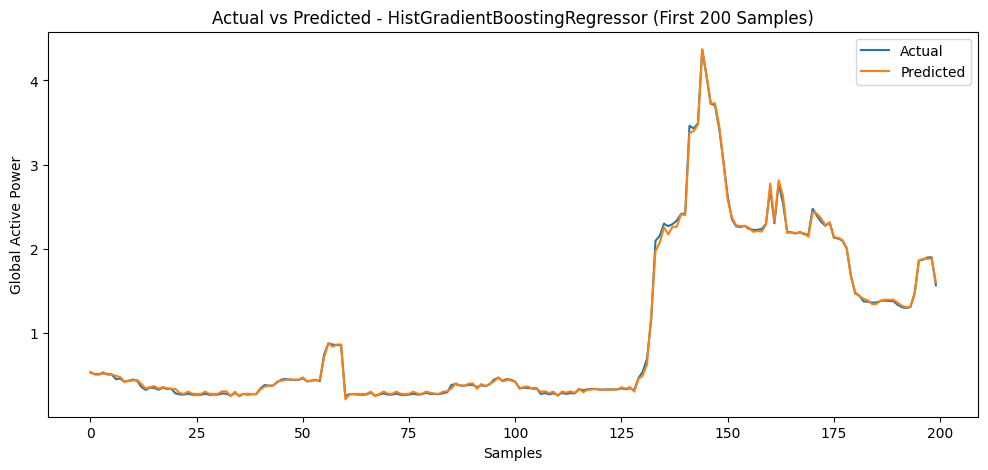

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test.values[:200], label="Actual")
plt.plot(y_pred_hgb[:200], label="Predicted")
plt.title("Actual vs Predicted - HistGradientBoostingRegressor (First 200 Samples)")
plt.xlabel("Samples")
plt.ylabel("Global Active Power")
plt.legend()
plt.show()

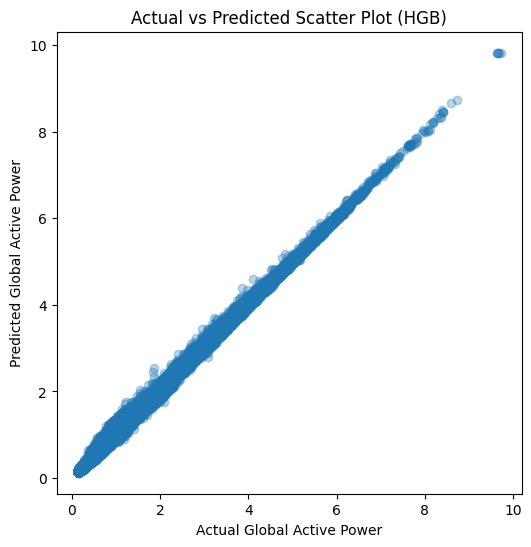

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_hgb, alpha=0.3)
plt.title("Actual vs Predicted Scatter Plot (HGB)")
plt.xlabel("Actual Global Active Power")
plt.ylabel("Predicted Global Active Power")
plt.show()

In [18]:
residuals_hgb = y_test - y_pred_hgb
print("Residuals calculated successfully!")

Residuals calculated successfully!


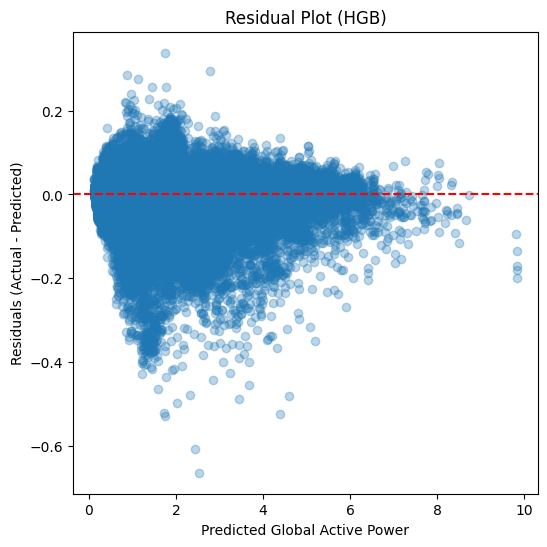

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(y_pred_hgb, residuals_hgb, alpha=0.3)
plt.axhline(y=0, color='red', linestyle='--')
plt.title("Residual Plot (HGB)")
plt.xlabel("Predicted Global Active Power")
plt.ylabel("Residuals (Actual - Predicted)")
plt.show()

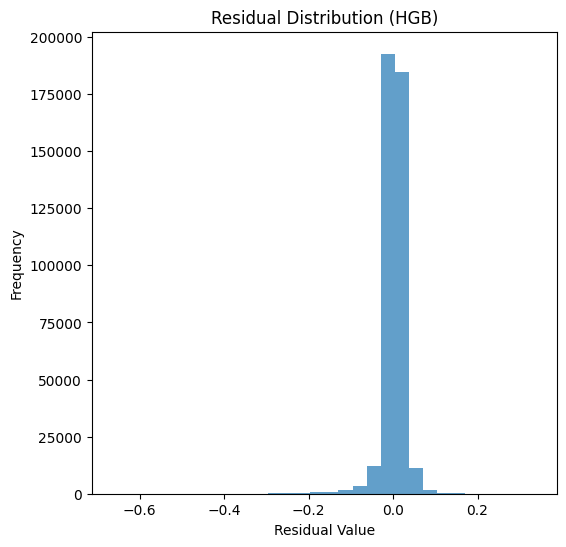

In [20]:
plt.figure(figsize=(6,6))
plt.hist(residuals_hgb, bins=30, alpha=0.7)
plt.title("Residual Distribution (HGB)")
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.show()

In [21]:
print("\n📌 Week 4 Conclusion (HGB Model):")
print("Residual plots help us understand model error behavior.")
print("If residuals are randomly scattered around 0 → model is good.")
print("If residuals show pattern → model needs improvement.")


📌 Week 4 Conclusion (HGB Model):
Residual plots help us understand model error behavior.
If residuals are randomly scattered around 0 → model is good.
If residuals show pattern → model needs improvement.


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

mae_hgb = mean_absolute_error(y_test, y_pred_hgb)
rmse_hgb = np.sqrt(mean_squared_error(y_test, y_pred_hgb))

results_df = pd.DataFrame({
    "Model": ["HistGradientBoostingRegressor"],
    "MAE": [mae_hgb],
    "RMSE": [rmse_hgb]
})

print("📌 Model Performance Summary:")
results_df

📌 Model Performance Summary:


,Model,MAE,RMSE
0,HistGradientBoostingRegressor,0.015578,0.026236


In [25]:
import joblib
joblib.dump(hgb, "best_model_hgb.pkl")
print("✅ Model saved successfully as best_model_hgb.pkl")

✅ Model saved successfully as best_model_hgb.pkl
